In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import * 
from tensorflow.keras.optimizers import *

In [ ]:
def MLP ():
    model = Sequential()
    model.add(Reshape((-1, 3)))
    model.add(Dense(64, activation='linear'))
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='linear'))
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='linear'))
    model.add(Dropout(0.2))
    model.add(Dense(8, activation='linear'))
    model.add(Dense(3))

    return model
def LSTM_NN():
  model = Sequential()
  model.add(LSTM(4,input_shape=(3,1)))
  model.add(Dense(3))

  return model

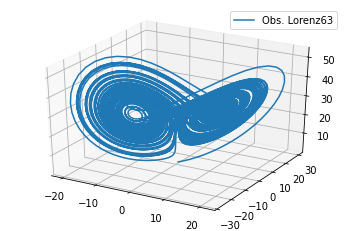

In [ ]:
data = pd.read_csv('data.csv')[['x','y','z']]
ax = plt.figure().add_subplot(projection='3d')
#ax.plot(pred[:,0], pred[:,1], pred[:,2], label='Lorenz63')
#ax.plot(y_test[:,0], y_test[:,1],y_test[:,2], label='Obs. Lorenz63')
ax.plot(data['x'], data['y'],data['z'], label='Obs. Lorenz63')
ax.legend()
plt.show()

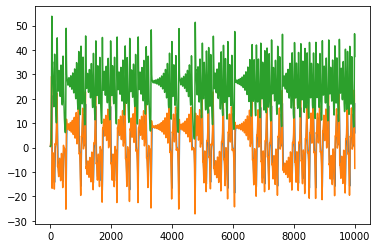

In [ ]:
data['x'].plot()
data['y'].plot()
data['z'].plot()

In [ ]:
X_train = data[:9500]
X_test = data[9500:-1]
y_train = data[1:9501]
y_test = data[-500:]
print(len(X_train),len(X_test),len(y_train),len(y_test))

9500 500 9500 500


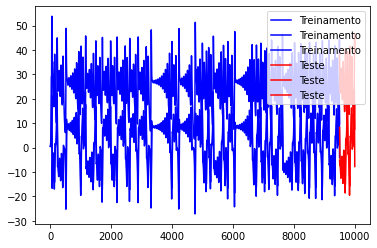

In [ ]:
#plt.figure(figsize=(20,10))
plt.plot(X_train,label='Treinamento',color='b')
plt.plot(X_test,label='Teste',color='r')
plt.legend()

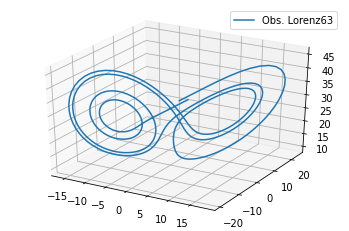

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
#ax.plot(pred[:,0], pred[:,1], pred[:,2], label='Lorenz63')
ax.plot(y_test['x'], y_test['y'],y_test['z'], label='Obs. Lorenz63')
ax.legend()
plt.show()

In [ ]:
#data = data.values
#X_train,X_test,y_train,y_test = train_test_split(data[:-1],data[1:],test_size=0.05)
#np.expand_dims(X_train, axis=2)

In [ ]:
model = LSTM_NN()
#model = MLP()
model.compile(optimizer="adam", loss=['mse','mae','mape'], metrics=['mse']) #adamax

es = EarlyStopping(patience=12, verbose=1, min_delta=0.001, monitor='loss', mode='auto', restore_best_weights=True)
lr_reduce = ReduceLROnPlateau(monitor="loss", factor=0.1, min_delta=0.0001, patience=5, verbose=1)
history = model.fit(
    X_train,
    y_train,
    epochs=150,
    batch_size=4,
    validation_split=0.2,
    callbacks=[es,lr_reduce],
    verbose=0,
)

pred = model.predict(X_test)


Epoch 132: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 4)                 96        
                                                                 
 dense (Dense)               (None, 3)                 15        
                                                                 
Total params: 111
Trainable params: 111
Non-trainable params: 0
_________________________________________________________________


In [ ]:
pred = np.reshape(pred,(500,3))

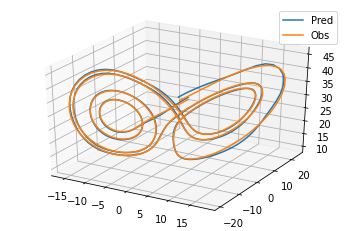

In [ ]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot(pred[:,0], pred[:,1], pred[:,2], label='Pred')
ax.plot(y_test['x'], y_test['y'],y_test['z'], label='Obs')
ax.legend()
plt.show()

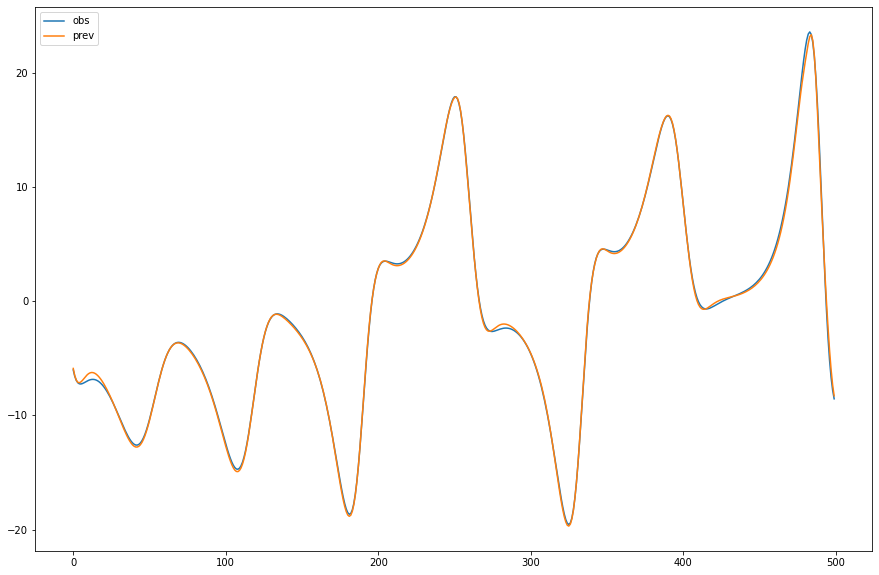

In [ ]:
plt.figure(figsize=(15,10))
pred_x = pred[:,0]
pred_y = pred[:,1]
pred_z = pred[:,2]

plt.plot(y_test['y'].values)
plt.plot(pred_y)
plt.legend(['obs','prev'])


In [ ]:
pred_x = pred[:,0]
pred_y = pred[:,1]
pred_z = pred[:,2]
tempo = pd.read_csv('data.csv')[['t']][-len(y_test):].values

d = {'t':tempo,'x':pred_x,'y':pred_y,'z':pred_z}

In [ ]:
prev.to_csv('prev_NN.csv',index=False)

## reservoirpy

In [ ]:
!pip install reservoirpy


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 167 kB 4.0 MB/s 


In [ ]:
X_train = data[:9500]
X_test = data[9500:-1]
y_train = data[1:9501]
y_test = data[-500:]

In [ ]:
from reservoirpy.nodes import Reservoir, Ridge
reservoir = Reservoir(350, lr=0.5, sr=0.5)
ridge = Ridge(ridge=1e-9)

esn_model = reservoir >> ridge
esn_model = esn_model.fit(X_train.values, y_train.values, warmup=1000)

Running Model-0:   0%|          | 0/1 [00:00<?, ?it/s]
Running Model-0: 240it [00:00, 2398.08it/s]           
Running Model-0: 527it [00:00, 2673.88it/s]
Running Model-0: 856it [00:00, 2954.13it/s]
Running Model-0: 1163it [00:00, 2997.23it/s]
Running Model-0: 1463it [00:00, 2967.10it/s]
Running Model-0: 1760it [00:00, 2963.43it/s]
Running Model-0: 2063it [00:00, 2984.27it/s]
Running Model-0: 2362it [00:00, 2750.92it/s]
Running Model-0: 2641it [00:01, 2248.25it/s]
Running Model-0: 2882it [00:01, 2008.05it/s]
Running Model-0: 3097it [00:01, 1941.96it/s]
Running Model-0: 3324it [00:01, 2022.80it/s]
Running Model-0: 3653it [00:01, 2352.61it/s]
Running Model-0: 3983it [00:01, 2609.81it/s]
Running Model-0: 4315it [00:01, 2806.85it/s]
Running Model-0: 4637it [00:01, 2923.45it/s]
Running Model-0: 4937it [00:01, 2812.67it/s]
Running Model-0: 5251it [00:02, 2903.96it/s]
Running Model-0: 5588it [00:02, 3036.65it/s]
Running Model-0: 5896it [00:02, 3046.99it/s]
Running Model-0: 6204it [00:02, 2897.

Fitting node Ridge-0...


Running Model-0: 500it [00:00, 3403.36it/s]


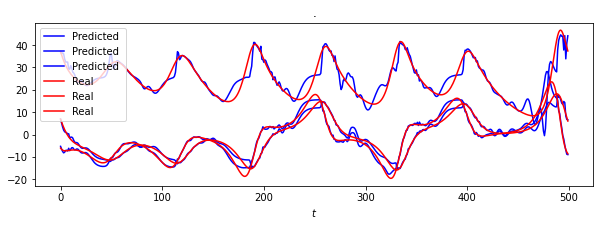

In [ ]:
Y_pred = esn_model.run(X_test.values)

plt.figure(figsize=(10, 3))
plt.title(".")
plt.xlabel("$t$")
plt.plot(Y_pred, label="Predicted ", color="blue")
plt.plot(y_test.values, label="Real ", color="red")
plt.legend()
plt.show()